In [1]:
import pandas as pd
data=pd.read_csv('train.csv')
data.head(2)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed


## Missing value

In [2]:
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

## Finding Outliers

In [3]:
numeric_column=data.select_dtypes(include=['number'])
numeric_column_name= data.select_dtypes(include=['number']).columns
numeric_column_name=list(numeric_column_name)

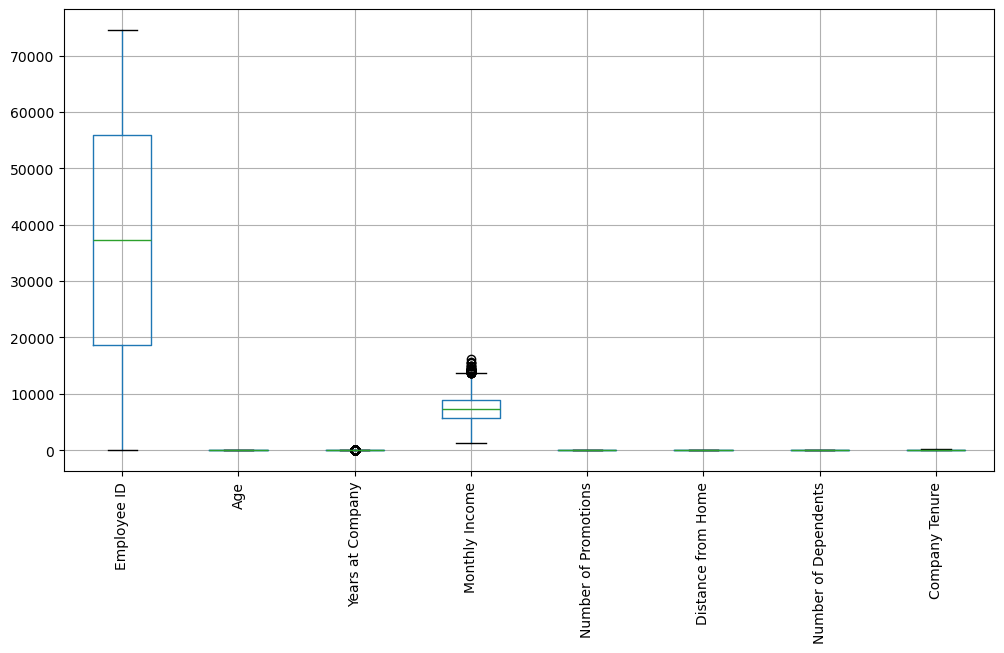

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
data.boxplot(column=numeric_column_name)
plt.xticks(rotation=90)
plt.show()

In [5]:
Q1=data['Monthly Income'].quantile(0.25)
Q3=data['Monthly Income'].quantile(0.75)
IQR= Q3-Q1
lower_limit= Q1-1.5*IQR
upper_limit= Q1+1.5*IQR
data['Monthly Income']=data['Monthly Income'].clip(lower_limit,upper_limit)

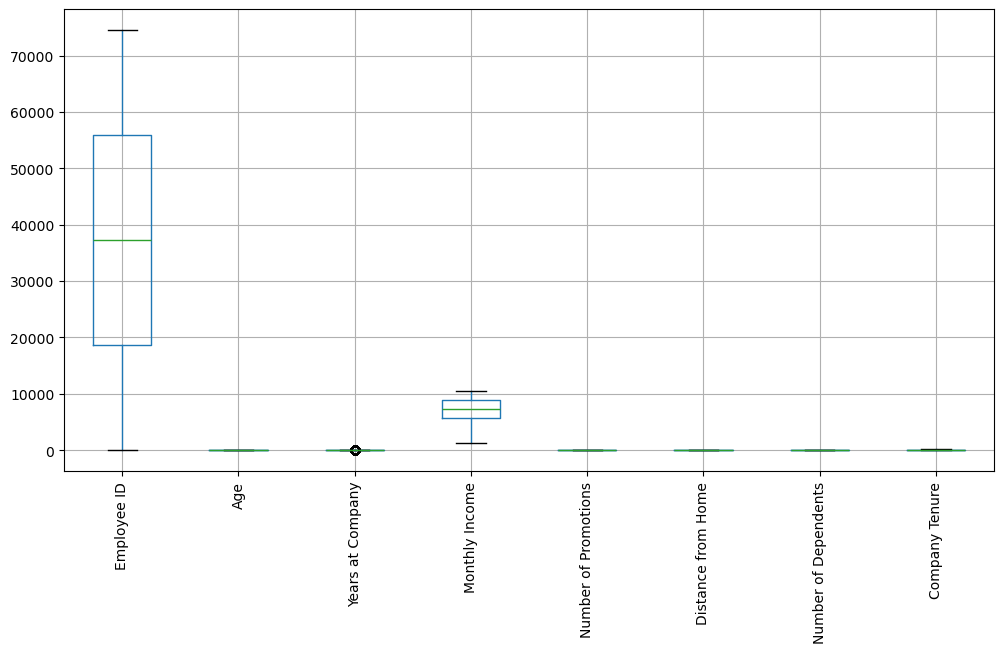

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
data.boxplot(column=numeric_column_name)
plt.xticks(rotation=90)
plt.show()

## Test train split

In [7]:
y=data['Attrition']
X=data.drop(['Attrition','Employee ID'], axis=1)

In [8]:
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

In [9]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for cols in cat_cols:
    le = LabelEncoder()
    X[cols] = le.fit_transform(X[cols].astype(str)) 
    label_encoders[cols] = le

In [10]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [14]:
# 1. Extract gender and create sample weights
#import numpy as np
#gender_train = X_train['Gender']
#sample_weight = np.where(gender_train == 'Female', 10, 1.0)  # Females get 1.5x weight

# 2. Drop gender from features (to prevent direct bias)
#X_train_final = X_train.drop(columns=['Gender'])
#X_test_final = X_test.drop(columns=['Gender'])

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
cat_col_indices = [X.columns.get_loc(col) for col in cat_cols]


In [16]:
X_train.head(100)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
1991,0.926829,1,0.74,0,0.301471,1,1,0,0.00,0,...,2,0.666667,1,1,0.531746,1,0,0,0,1
1402,0.219512,0,0.02,0,0.351390,2,3,0,0.00,0,...,0,0.166667,2,2,0.031746,0,0,0,1,0
39765,0.804878,0,0.70,4,0.940926,0,0,0,0.75,0,...,1,0.500000,1,2,0.793651,0,0,0,3,2
43544,0.634146,1,0.58,0,0.407847,0,1,0,0.00,1,...,2,0.833333,0,1,0.571429,0,0,0,1,1
45355,0.365854,1,0.36,1,0.349537,2,0,1,0.25,1,...,1,0.333333,1,1,0.476190,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10392,0.121951,1,0.08,4,0.867684,2,2,0,0.00,0,...,2,0.666667,1,1,0.579365,0,0,0,2,1
2634,0.414634,0,0.20,3,0.473787,2,2,1,0.25,1,...,1,0.666667,1,1,0.142857,0,0,0,2,1
10249,0.000000,1,0.16,4,1.000000,3,2,0,0.25,1,...,0,0.166667,1,2,0.079365,0,0,0,1,2
33462,0.317073,0,0.30,3,0.567956,2,0,0,0.00,0,...,2,0.166667,2,1,0.666667,0,0,0,0,1


## Standardisation and Encoding 

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
xgb = XGBClassifier(
    objective='binary:logistic',
    random_state=0,
    use_label_encoder=False,
    eval_metric='auc',
    early_stopping_rounds=100
)

param_dist = {
    'n_estimators': randint(1000, 6000),     
    'learning_rate': uniform(0.01, 0.2),      
    'reg_alpha': uniform(0, 2),              
    'reg_lambda': uniform(1, 10),           
    'subsample': uniform(0.6, 0.4),          
    'colsample_bytree': uniform(0.6, 0.4)    
}
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='roc_auc',  
    cv=5,
    verbose=1,
    random_state=0,
    n_jobs=-1  # use all cores
)

# Fit on your resampled data
random_search.fit(X_train, y_train,
    eval_set=[(X_test, y_test)])
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

best_xgb_model = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[0]	validation_0-auc:0.79376
[1]	validation_0-auc:0.79704
[2]	validation_0-auc:0.81155


D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:45:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation_0-auc:0.81370
[4]	validation_0-auc:0.81354
[5]	validation_0-auc:0.81402
[6]	validation_0-auc:0.81594
[7]	validation_0-auc:0.81600
[8]	validation_0-auc:0.81690
[9]	validation_0-auc:0.81664
[10]	validation_0-auc:0.81728
[11]	validation_0-auc:0.81667
[12]	validation_0-auc:0.81890
[13]	validation_0-auc:0.81955
[14]	validation_0-auc:0.81944
[15]	validation_0-auc:0.82016
[16]	validation_0-auc:0.81991
[17]	validation_0-auc:0.82066
[18]	validation_0-auc:0.81998
[19]	validation_0-auc:0.82091
[20]	validation_0-auc:0.82235
[21]	validation_0-auc:0.82287
[22]	validation_0-auc:0.82336
[23]	validation_0-auc:0.82364
[24]	validation_0-auc:0.82433
[25]	validation_0-auc:0.82543
[26]	validation_0-auc:0.82659
[27]	validation_0-auc:0.82800
[28]	validation_0-auc:0.82845
[29]	validation_0-auc:0.82815
[30]	validation_0-auc:0.82888
[31]	validation_0-auc:0.82887
[32]	validation_0-auc:0.82994
[33]	validation_0-auc:0.82964
[34]	validation_0-auc:0.82945
[35]	validation_0-auc:0.82979
[36]	validation_0

In [18]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(
    colsample_bytree= 0.8092992213866799, 
    learning_rate=  0.02878810215168834, 
    max_depth= 2, 
    n_estimators=5182, 
    reg_alpha= 0.6371379049026473, 
    reg_lambda=7.674103799636817, 
    subsample= 0.6527191449617569,
    random_state=0
)

classifier_xgb.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8092992213866799, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02878810215168834,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5182, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [65]:
#test train accuracies
y_pred_test=classifier_xgb.predict(X_test)
y_pred_train=classifier_xgb.predict(X_train)
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,roc_auc_score
acc_train=accuracy_score(y_train,y_pred_train)
acc_test=accuracy_score(y_test,y_pred_test)
print("training accuracy:",acc_train)
print("testing accuracy:",acc_test)
f1_train=f1_score(y_train,y_pred_train)
f1_test=f1_score(y_test,y_pred_test)
print("training F1_score:",f1_train)
print("testing F1_score:",f1_test)
# Probabilities (for AUC)
y_proba_test = classifier_xgb.predict_proba(X_test)[:, 1]
y_proba_train = classifier_xgb.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_proba_train)
auc_test = roc_auc_score(y_test, y_proba_test)
print("Training AUC:", auc_train)
print("Testing AUC:", auc_test)

training accuracy: 0.7686144553043333
testing accuracy: 0.7595637583892617
training F1_score: 0.7795804195804196
testing F1_score: 0.7717062290903298
Training AUC: 0.8633643815364174
Testing AUC: 0.8487333594534152


In [66]:
# checking bias over Gender
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.metrics import accuracy_score, roc_auc_score

mf = MetricFrame(
    metrics={
        "Accuracy": accuracy_score,
        "AUC": roc_auc_score,
        "Selection Rate": selection_rate
    },
    y_true=y_test,
    y_pred=y_pred_test,
    sensitive_features=X_test["Gender"]
)

print(mf.by_group)

        Accuracy       AUC  Selection Rate
Gender                                    
0       0.762514  0.760596        0.448438
1       0.757190  0.749329        0.593249


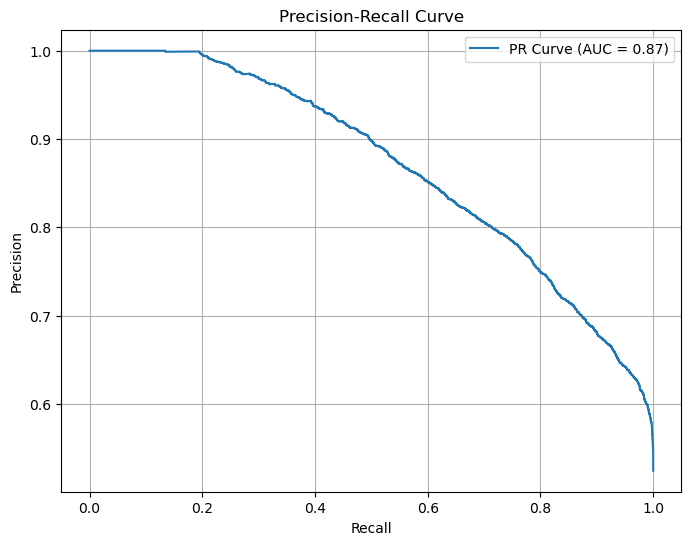

In [67]:
# precision Recall curve for baised model

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, classification_report,roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
# the diffrence of selection rate is High, model is biased

In [23]:
# use fireness reduction technique

from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from xgboost import XGBClassifier

# Create the fairness-aware mitigation object
mitigator_xgb = ExponentiatedGradient(
    estimator=XGBClassifier(colsample_bytree= 0.8092992213866799, 
    learning_rate=  0.02878810215168834, 
    max_depth= 2, 
    n_estimators=5182, 
    reg_alpha= 0.6371379049026473, 
    reg_lambda=7.674103799636817, 
    subsample= 0.6527191449617569,
    random_state=0),
    constraints=DemographicParity()
)

mitigator_xgb.fit(X_train, y_train, sensitive_features=data.loc[X_train.index, 'Gender'])



ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x000002199A46E990>,
                      estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8092992213866799,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.02878810215168834,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=2,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=5182, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=0, ...),
                      nu=0.0009656904356474921)

In [24]:
#test train accuracies
y_pred_test=mitigator_xgb.predict(X_test)
y_pred_train=mitigator_xgb.predict(X_train)


In [25]:
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.metrics import accuracy_score, roc_auc_score

mf = MetricFrame(
    metrics={
        "Accuracy": accuracy_score,
        "AUC": roc_auc_score,
        "Selection Rate": selection_rate
    },
    y_true=y_test,
    y_pred=y_pred_test,
    sensitive_features=X_test["Gender"]
)

print(mf.by_group)

        Accuracy       AUC  Selection Rate
Gender                                    
0       0.747460  0.749028        0.519195
1       0.755677  0.755337        0.535422


## Deep learing model

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
#Model development
def model(hp):
    ann = tf.keras.models.Sequential()

    # Hyperparameters
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01, sampling='log')
    l2_regularizer = hp.Float('l2_regularizer', min_value=0.0001, max_value=0.01, step=0.001)
    kernel_initializer = hp.Choice('kernel_initializer', values=['he_uniform', 'glorot_uniform', 'lecun_normal'])
    activation = hp.Choice('activation', values=['relu', 'tanh', 'LeakyReLU'])

    # input layer
    ann.add(tf.keras.layers.Input(shape=(X_train.shape[1],)
    ))
    #first hidden layer
    ann.add(tf.keras.layers.BatchNormalization())
    ann.add(tf.keras.layers.Dense(256,kernel_initializer=kernel_initializer, activation=activation,
        kernel_regularizer=tf.keras.regularizers.l2(l2_regularizer)        
    ))
    #second hidden layer
    ann.add(tf.keras.layers.BatchNormalization())
    ann.add(tf.keras.layers.Dense(128,kernel_initializer=kernel_initializer,activation=activation,
        kernel_regularizer=tf.keras.regularizers.l2(l2_regularizer)
    ))
    #Third hidden layer
    ann.add(tf.keras.layers.BatchNormalization())
    ann.add(tf.keras.layers.Dense(64,kernel_initializer=kernel_initializer,activation=activation,
        kernel_regularizer=tf.keras.regularizers.l2(l2_regularizer)
    ))
    #output layer
    ann.add(tf.keras.layers.BatchNormalization())
    ann.add(tf.keras.layers.Dense(1,kernel_initializer=kernel_initializer, activation='sigmoid',
        kernel_regularizer=tf.keras.regularizers.l2(l2_regularizer)
    ))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])

    return ann

# Create the tuner with 10 trials and save in folder
tuner = kt.RandomSearch(
    model,  
    objective='val_loss',  
    max_trials=20, 
    directory='cap_project2'
    )
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_auc',       # Monitor validation loss (you can change this to 'val_mae' if needed)
    patience=5,               # Number of epochs to wait for improvement (you can adjust this)
    restore_best_weights=True # Restore the best model weights after early stopping
)
# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping] )

Reloading Tuner from cap_project2\untitled_project\tuner0.json


In [27]:
best_model = tuner.get_best_models(num_models=1)[0]

In [28]:
# evaluate model
val_loss, val_auc = best_model.evaluate(X_test, y_test)
print("\nBest Model Validation AUC:", val_auc)
print("\nBest Model Validation Loss:", val_loss) 

373/373 [==============================] - 2s 3ms/step - loss: 0.4938 - auc: 0.8395

Best Model Validation AUC: 0.8394941091537476

Best Model Validation Loss: 0.49381083250045776


100%|===================| 11905/11920 [09:34<00:00]        

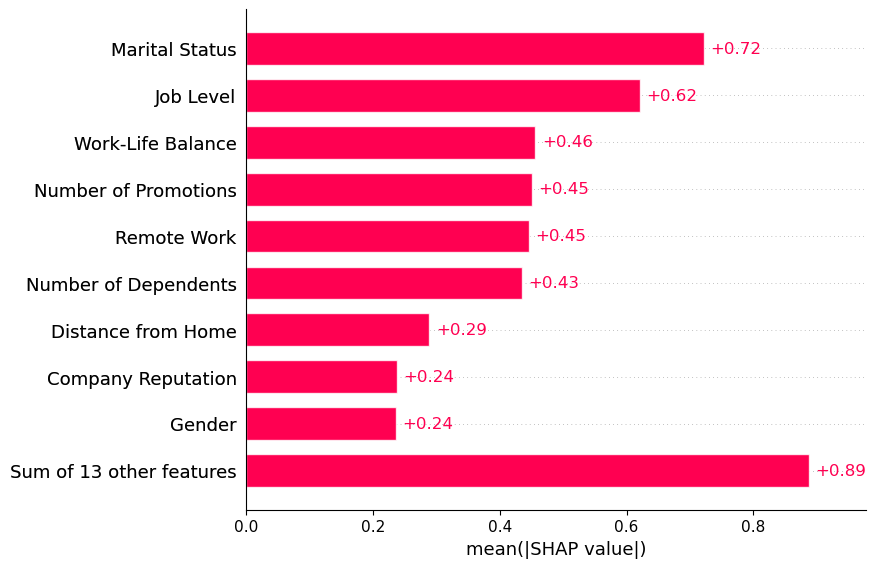

In [30]:
import shap
import numpy as np
shap.initjs()
background = X.sample(100, random_state=42)
explainer = shap.Explainer(best_xgb_model, background)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

## Sensitivity of XGBoost Model

In [96]:
import numpy as np

# Pick one sample from test set
x = X_test.iloc[0].values.reshape(1, -1)

# Create perturbation
epsilon = 0.1
delta = np.random.normal(0, epsilon, size=x.shape)
x_perturbed = x + delta
y_pred = mitigator_xgb.predict(x)
y_perturbed = mitigator_xgb.predict(x_perturbed)

# Sensitivity
sensitivity = np.abs(y_perturbed - y_pred) / np.linalg.norm(delta)
print(f"Sensitivity: {sensitivity[0]:.4f}")

Sensitivity: 0.0000


In [97]:
import numpy as np

# Pick one sample from test set
x = X_test.iloc[0].values.reshape(1, -1)

# Create perturbation
epsilon = 1
delta = np.random.normal(0, epsilon, size=x.shape)
x_perturbed = x + delta


# Make predictions (for any trained model)
y_pred = mitigator_xgb.predict(x)
y_perturbed = mitigator_xgb.predict(x_perturbed)

# Sensitivity
sensitivity = np.abs(y_perturbed - y_pred) / np.linalg.norm(delta)
print(f"Sensitivity: {sensitivity[0]:.4f}")


Sensitivity: 0.2576


## model validation 

In [77]:
df_val = pd.read_csv("test.csv")


In [78]:
y_val=df_val['Attrition']
X_val=df_val.drop(['Attrition','Employee ID'], axis=1)

In [79]:
X_val['Gender'].value_counts()

Gender
Male      8087
Female    6813
Name: count, dtype: int64

In [80]:
num_cols_val = X_val.select_dtypes(include=['number']).columns
cat_cols_val = X_val.select_dtypes(include=['object', 'category']).columns

In [81]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for cols in cat_cols_val:
    le = LabelEncoder()
    X_val[cols] = le.fit_transform(X_val[cols].astype(str)) 
    label_encoders[cols] = le

In [82]:
le_y = LabelEncoder()
y_val = le_y.fit_transform(y_val)

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_val[num_cols_val] = scaler.fit_transform(X_val[num_cols_val])

In [84]:
X_val.head(2)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,0.439024,1,0.24,2,0.491653,0,0,0,0.25,1,...,1,0.166667,1,0,0.16,0,0,0,3,2
1,0.414634,1,0.12,0,0.241165,2,0,0,0.25,1,...,2,0.666667,0,1,0.20,0,0,0,2,0


In [85]:
y_pred_val=mitigator_xgb.predict(X_val)
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,roc_auc_score
acc_val=accuracy_score(y_val,y_pred_val)
f1_val=f1_score(y_val,y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
print("validation accuracy:",acc_test)
print("validation F1_score:",f1_test)
print("validation AUC:", auc_test)

validation accuracy: 0.7595637583892617
validation F1_score: 0.7717062290903298
validation AUC: 0.8487333594534152


## precision recall and ROC curve on based on validation dataset 

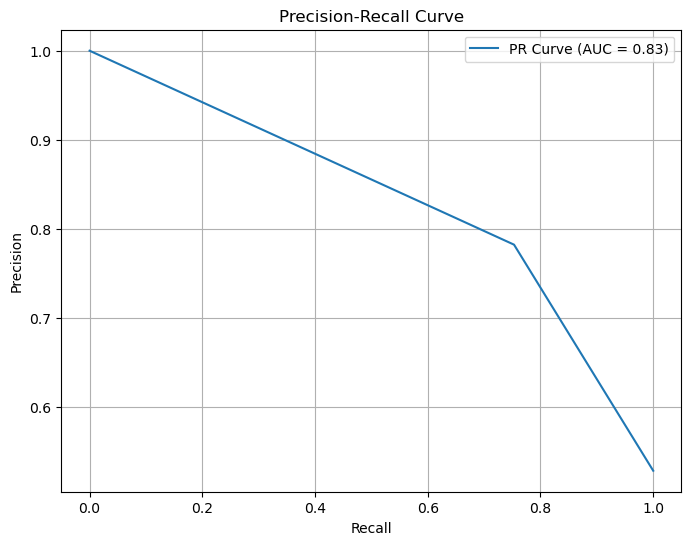

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, classification_report,roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

precision, recall, thresholds = precision_recall_curve(y_val, y_pred_val)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()


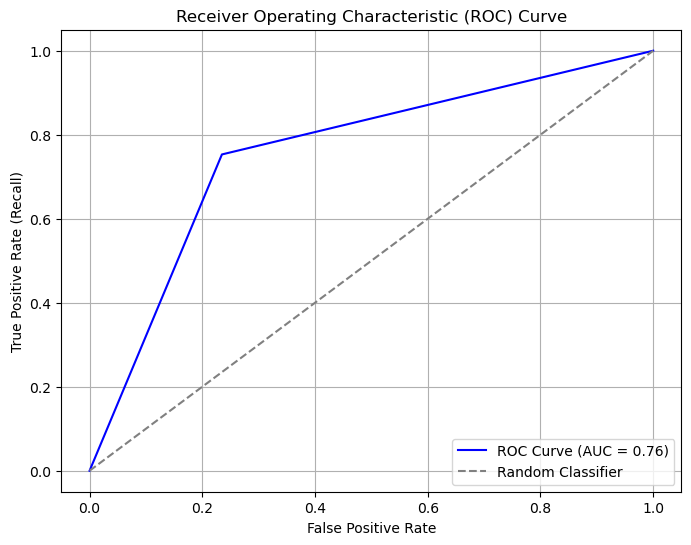

In [87]:
# Compute False Positive Rate and True Positive Rate
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [88]:
print(classification_report(y_val, y_pred_val))


              precision    recall  f1-score   support

           0       0.73      0.77      0.75      7032
           1       0.78      0.75      0.77      7868

    accuracy                           0.76     14900
   macro avg       0.76      0.76      0.76     14900
weighted avg       0.76      0.76      0.76     14900



In [89]:
cm = confusion_matrix(y_val, y_pred_val)
print(cm)


[[5381 1651]
 [1943 5925]]


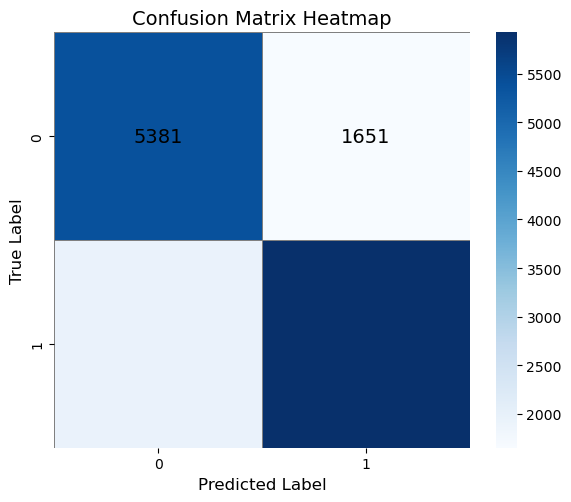

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            cbar=True, square=True, linewidths=0.5,
            linecolor='gray', annot_kws={"size": 14, "color": 'black'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix Heatmap', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Bias

In [90]:
!pip install fairlearn

In [93]:
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.metrics import accuracy_score, roc_auc_score

mf = MetricFrame(
    metrics={
        "Accuracy": accuracy_score,
        "AUC": roc_auc_score,
        "Selection Rate": selection_rate
    },
    y_true=y_val,
    y_pred=y_pred_val,
    sensitive_features=df_val["Gender"]
)

print(mf.by_group)


        Accuracy       AUC  Selection Rate
Gender                                    
Female  0.755908  0.756154        0.492734
Male    0.761222  0.763565        0.521701


In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=["Gender"], axis=1)
y = df["Gender"]

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

mi = mutual_info_classif(X_encoded, y, discrete_features='auto')
mi_scores = pd.Series(mi, index=X_encoded.columns).sort_values(ascending=False)
print(mi_scores.head(20))


In [ ]:
# Separate Male and Female data
male_data = df_v[df_v['Gender'] == 'Male']
female_data = df_v[df_v['Gender'] == 'Female']

# Downsample Male to match Female count
male_downsampled = male_data.sample(n=len(female_data), random_state=42)  # Ensures reproducibility

# Combine with Female data
df_val = pd.concat([male_downsampled, female_data])

# Verify balance
print("\nBalanced Gender Counts:")
print(df_val['Gender'].value_counts())